In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data validation:
- week Week sale was made, counted as weeks since product launch
- sales_method Character, which of the three sales methods were used for that customer
- customer_id Character, unique identifier for the customer
- nb_sold Numeric, number of new products sold
- revenue Numeric, revenue from the sales, rounded to 2 decimal places.
- years_as_customer Numeric, number of years customer has been buying from us (company founded in 1984)
- nb_site_visits Numeric, number of times the customer has visited our website in the last 6 months
- state Character, location of the customer i.e. where orders are shipped

## Issues :
### Quality Issues : 
- Completeness : There are missing values on revenue column -> 1074
- Consistency : sales_method like -> 'Email', 'Email + Call', 'Call', 'em + call', 'email'
- Accuracy : the company is built since 1984 so the maximum years_as_customer is 39 years but there are customers which deal with the company more than 39 like 63 years which is not valid 

## Cleaning Steps :
- I will use Iterative Imputer with Non Parametric model that not assumes any assumption about distribution ,because the column which has missing values "revenue" isn't normal or i can use any transformation to handle skewed then use Parametric model ,because there is not outliers so i will use mean as initial value ,i will predict values of revenue using nb_sold column/feature/predictor because it is high correlated to revenue 
- the maximum years_as_customer is 39 years but there are customers which deal with the company more than 39 like 63 years which is not valid ,i will drop this observation
- 'Email', 'Email + Call', 'Call', 'em + call', 'email' , replace 'em + call' to 'Email + Call' and i will change all to lower case


# Data Wrangle and (EDA or Preprocessing)


## Gathering Data

In [5]:
df=pd.read_csv(r'C:\Users\HP\Desktop\datacamp\Professional\product_sales.csv')

## Data assessing 
- Tidy Issues : There is no Tidy Issues

- Quality Issues : 
- Completeness : There are missing values on revenue column -> 1074
- Consistency : sales_method like -> 'Email', 'Email + Call', 'Call', 'em + call', 'email'
- Accuracy : the company is built since 1984 so the maximum years_as_customer is 39 years but there are customers which deal with the company more than 39 like 63 years which is not valid ,i will drop this observation

In [6]:
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

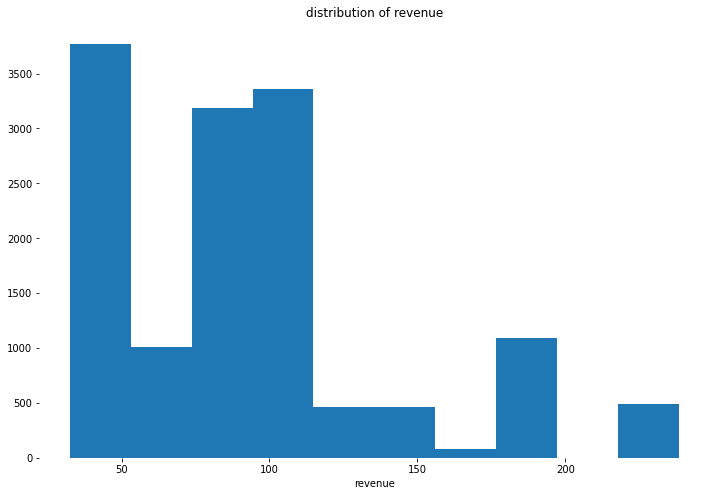

In [7]:
plt.subplots(figsize=(12,8))
df['revenue'].hist()
plt.title('distribution of revenue')
plt.xlabel('revenue')
plt.box(False)
plt.grid(False)
plt.show()

In [8]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


After comparing the mean ,median ,it turns out that there are no extreme outliers

- I will use Iterative Imputer with <b> Non Parametric </b> model that not assumes any assumption about distribution ,because the column which has missing values isn't normal or i can use any transformation to handle skewed then use <b> Parametric </b> model

- because there is not outliers so i will use mean as initial value

- Instead of doing this step on two parts which means to change missing values to specific value on wrangle part then try to increase performance of the model or analysis on EDA or Preprocessing by using Advanced technique i will handle missing values using advanced techinque direct

## ( modifying or clean ) and ( EDA or Preprocessing ) 

##### Completeness : There are missing values on revenue column -> 1074

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.svm import SVR

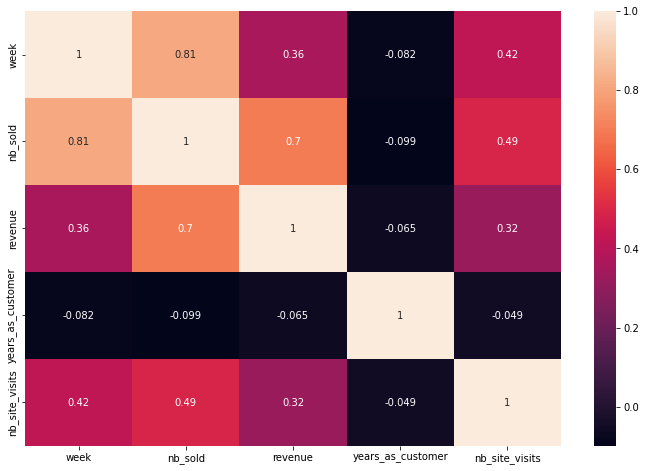

In [10]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

- i will predict values of revenue using nb_sold column/feature/predictor

In [11]:
Iterative_Imputer=IterativeImputer(estimator=SVR(),random_state=42)

In [12]:
X=df[['revenue','nb_sold']]

In [13]:
df[['revenue','nb_sold']] = pd.DataFrame(Iterative_Imputer.fit_transform(X),columns=Iterative_Imputer.get_feature_names_out())

In [14]:
df['nb_sold']=df['nb_sold'].astype(int)

##### Accuracy : the company is built since 1984 so the maximum years_as_customer is 39 years but there are customers which deal with the company more than 39 like 63 years which is not valid ,i will drop this observation

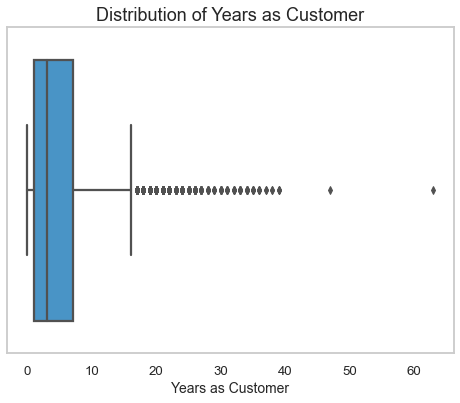

In [15]:
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=0.8)

# Create boxplot with customized parameters
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df['years_as_customer'], ax=ax, color='#3498db')
ax.set_xlabel('Years as Customer', fontsize=14)
ax.set_title('Distribution of Years as Customer', fontsize=18)
plt.grid(False)
plt.show()

In [16]:
df['years_as_customer'].max()

63

In [17]:
df[df['years_as_customer']>39].index

Int64Index([13741, 13800], dtype='int64')

In [18]:
df = df[df.index.isin(df[df['years_as_customer']>39].index)==False]

##### Consistency : sales_method like -> 'Email', 'Email + Call', 'Call', 'em + call', 'email'

In [19]:
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [20]:
df['sales_method']=df['sales_method'].str.lower()\
                  .replace('em + call','email + call')

# Analysis

### Questions:

1. How many customers were there for each approach?
2. What does the spread of the revenue look like overall? And for each method?
3. Was there any difference in revenue over time for each of the methods?
4. Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team, so they may not be the best for us to use if the results are similar.


In [21]:
def axis(xlabel,ylabel,title):
    return plt.title(title),plt.xlabel(xlabel),plt.ylabel(ylabel)

1. How many customers were there for each approach?


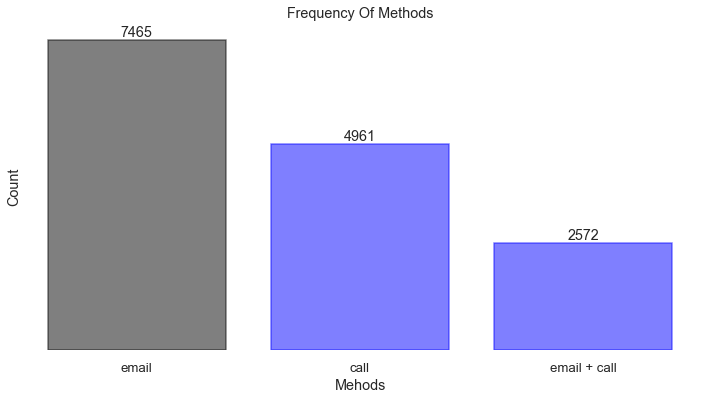

In [22]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
bars = sns.countplot(data=df,x='sales_method',order=['email','call','email + call'],ax=ax,alpha=0.5)
axis('Mehods','Count','Frequency Of Methods')
plt.yticks([])
plt.box(False)
bars.patches[0].set_color('black')
bars.patches[1].set_color('blue')
bars.patches[2].set_color('blue')

for _ in bars.containers:
    bars.bar_label(_)

email method get most number of orders rather than call or mixed methods

2. What does the spread of the revenue look like overall? And for each method?


In [23]:
def plot_hist_freedman_diaconis(df, column, n_bins=None):
    """ Plot a histogram of a column in a dataframe using the Freedman-Diaconis rule to determine the number of bins."""
    """
    Parameters:
        -----------
        df : pandas.DataFrame
            The dataframe containing the column to plot.
        column : str
            The name of the column to plot.
        n_bins : int, optional
            The number of bins to use in the histogram. If not provided, the number of bins will be determined
            using the Freedman-Diaconis rule.

        Returns:
        --------
            None   
    """
    
    
    # Determine the number of bins using the Freedman-Diaconis rule
    if not n_bins:
        q1, q3 = np.percentile(df[column], [25, 75])
        iqr = q3 - q1
        bin_width = 2 * iqr / (len(df) ** (1/3))
        n_bins = int(np.ceil((max(df[column]) - min(df[column])) / bin_width))
    
    # Generate the histogram
    n, bins, patches = plt.hist(df[column], bins=n_bins, edgecolor='white', alpha=0.7,color='green')

    # Add labels and title
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column.capitalize()}')

    # Add x-axis labels
    bin_width = (max(df[column]) - min(df[column]))/n_bins 
    xticks = np.arange(min(df[column]), max(df[column]), bin_width)
    xlabels = [round(x, 2) for x in np.arange(min(df[column]) + bin_width/2, max(df[column]), bin_width)]
    plt.xticks(xticks, xlabels, rotation=90)

    plt.box(False)
    # Show the plot
    plt.show()


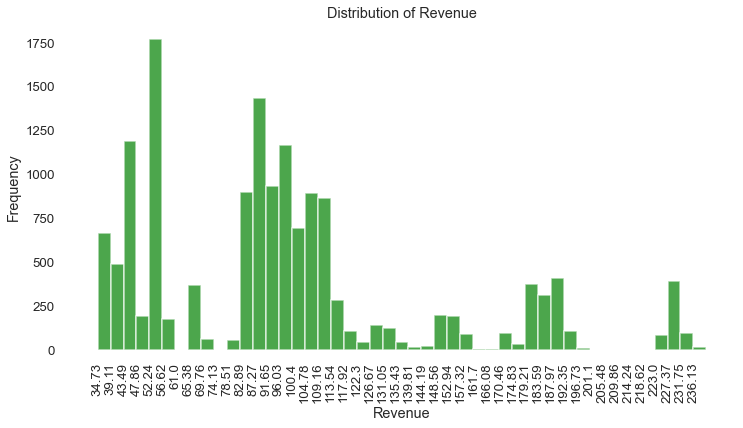

In [24]:
plt.figure(figsize=(12, 6))
plt.grid(False)
plot_hist_freedman_diaconis(df,'revenue')


most revenues between (34.73 and 56.62) ,(87.27 and 109.16)

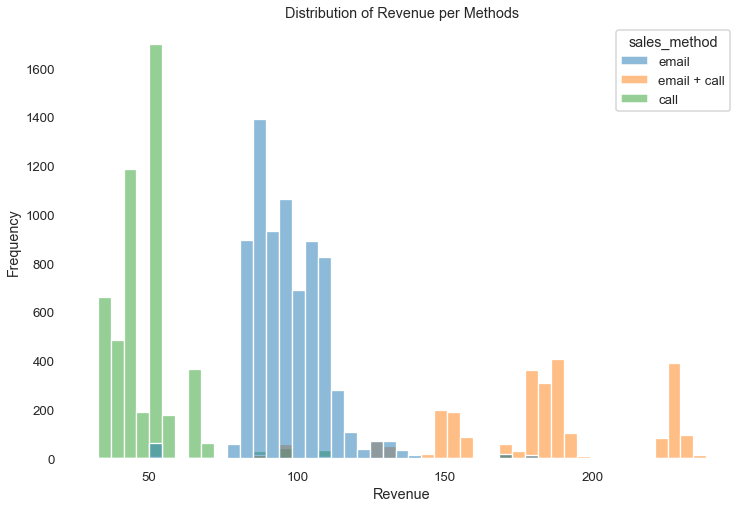

In [25]:
plt.figure(figsize=(12,8))
plt.box(False)
plt.ylabel('Frequency')
plt.xlabel('Revenue')
plt.title('Distribution of Revenue per Methods')
sns.histplot(data=df,x='revenue',hue='sales_method',bins=47)
plt.grid(False)
plt.show()

The two methods that have a higher frequency of orders but lower revenue per order may be good for generating a steady stream of revenue, but may not be as effective at generating high-value sales. These methods may be more appropriate for targeting customers who are price-sensitive or who are interested in a wider range of products.

The method that has a lower frequency of orders but higher revenue per order may be more effective at generating high-value sales, but may not be as reliable for generating a steady stream of revenue. This method may be more appropriate for targeting customers who are willing to pay a premium for high-quality or specialized products.


3. Was there any difference in revenue over time for each of the methods?

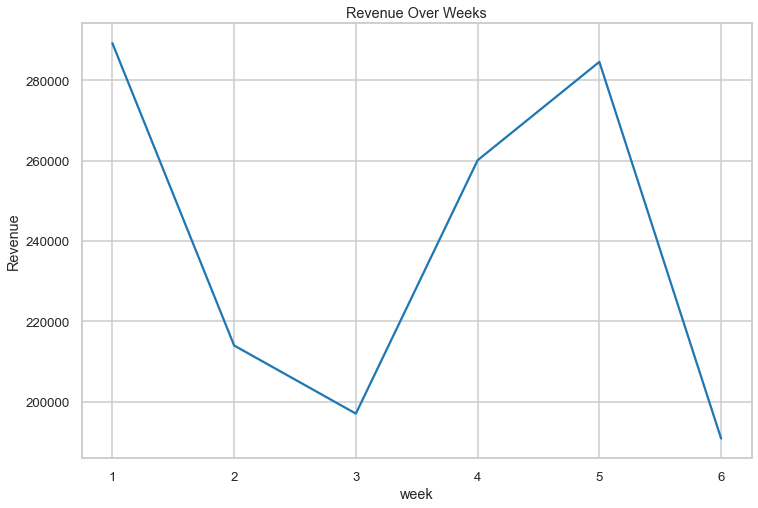

In [26]:
plt.figure(figsize=(12,8))
df.groupby('week')['revenue'].sum().plot()
plt.title('Revenue Over Weeks')
plt.ylabel('Revenue')
plt.show()

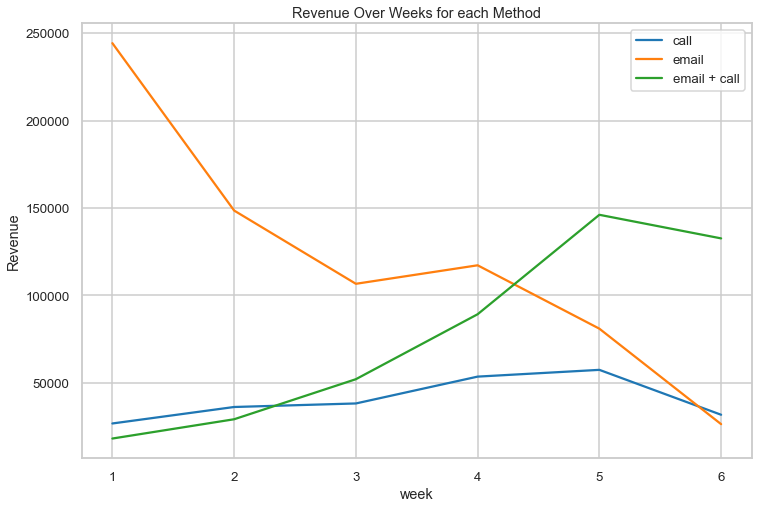

In [27]:
plt.figure(figsize=(12,8))
df.groupby(['sales_method','week'])['revenue'].sum()['call'].plot(label='call')
df.groupby(['sales_method','week'])['revenue'].sum()['email'].plot(label='email')
df.groupby(['sales_method','week'])['revenue'].sum()['email + call'].plot(label='email + call')
plt.title('Revenue Over Weeks for each Method')
plt.ylabel('Revenue')
plt.legend()
plt.show()

* from last two plots
- revenue of email on first week is highest which email and call is lowest ,while revenue of email and call is highest on last week while email is lowest ,also revenue of emaill decrease while revenue of email and call increase over the six weeks
- email indicator decreases overtime ,while another methods increase
- there is a fall on revenue on week 2 ,3 and 6

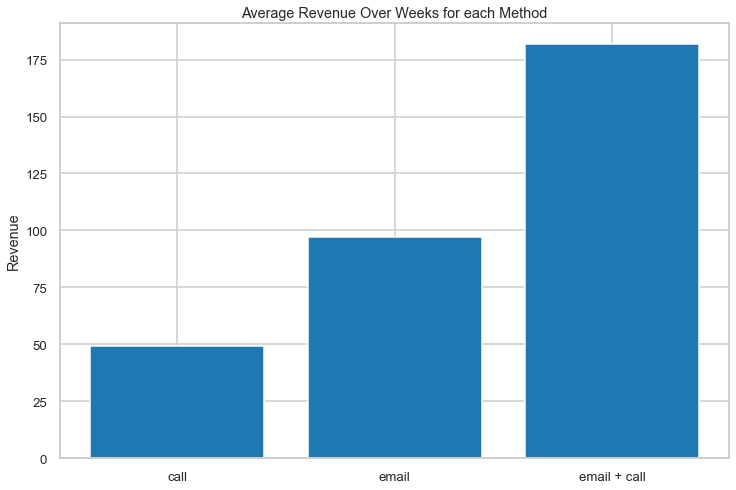

In [28]:
plt.figure(figsize=(12,8))
plt.bar(df.groupby('sales_method')['revenue'].mean().index,df.groupby('sales_method')['revenue'].mean().values)
plt.title('Average Revenue Over Weeks for each Method')
plt.ylabel('Revenue')
plt.show()

Average Revenue of email + call is highest than email over the weeks

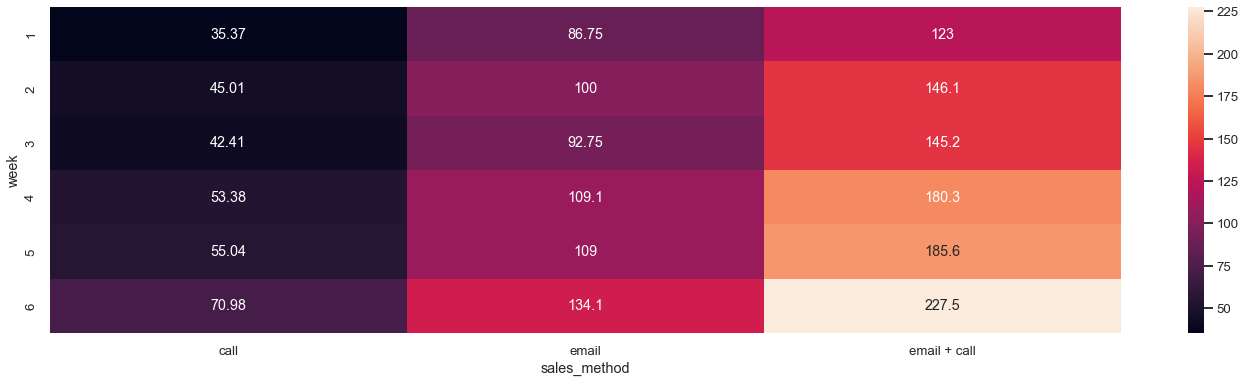

In [29]:
plt.subplots(1,1,figsize=(24,6))
sns.heatmap(df.pivot_table(values='revenue',index='week',columns='sales_method',aggfunc='mean',),annot=True,fmt='.4g')
plt.show()

- average of email&call method is highest one over another methods followed by email then call 
- there is a weird fall of average revenue on week 3 ,but overall average revenue increases overtime

4. Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team, so they may not be the best for us to use if the results are similar.


# Business Metric 

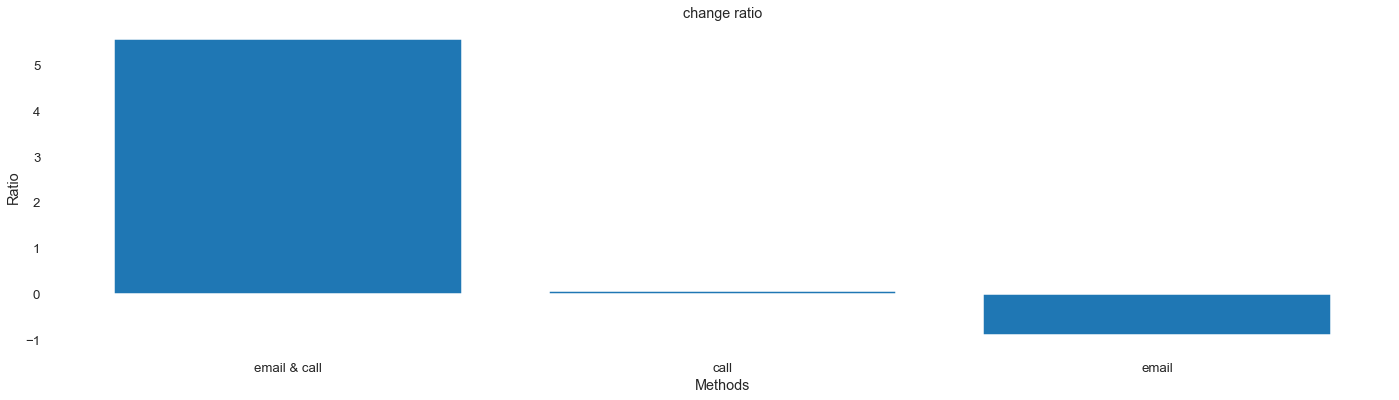

In [30]:
labels = ['email & call','call','email']
values = [5.582759709167662, 0.08003844157194522, -0.8968219996426793]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(24,6))

# Create a bar plot with negative height
ax.bar(labels, values)
plt.title('change ratio')
plt.xlabel('Methods')
plt.ylabel('Ratio')
plt.grid(False)
plt.box(False)
# Show the plot
plt.show()

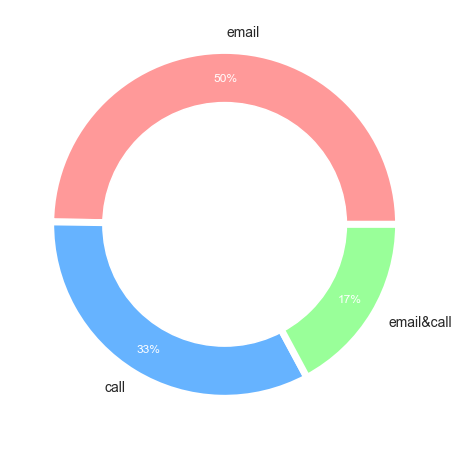

In [31]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts =ax.pie(df['sales_method'].value_counts(), labels=['email','call','email&call'], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'},autopct='%.0f%%',pctdistance=0.84)
ax.add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
plt.show()


# Business Metric

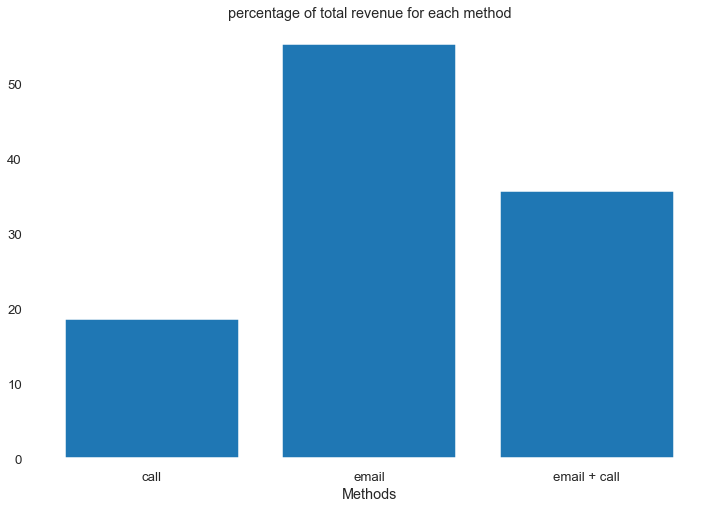

In [32]:
plt.subplots(figsize=(12,8))
plt.bar((df.groupby('sales_method')['revenue'].sum()/(227563.49+672317.83+408256.69)*100).index,(df.groupby('sales_method')['revenue'].sum()/(227563.49+672317.83+408256.69)*100).values)
plt.title('percentage of total revenue for each method')
plt.xlabel('Methods')
plt.grid(False)
plt.box(False)
plt.show()

email & call method his change ratio increase from week 1 to week 6 by 5.58% and email decrease by 0.89% as we see in Revenue Over Weeks for each Method plot 
in addition to that the email method has about 50% of total orders ,if we compare total orders to total revenue to change ratio ,we end up to that email method doesn't give us good revenue for all total orders has been gotten unlike email&call method which hasing lowest number of order about 17% of the total orders and also has 38% of total revenue which is most useful in addition to his indicator which is increasing overtime by 5.8 times 
and already we don't need call method because of many things first is that the sales team doesn't want method that takes more time in addition of his lowest revenue percentage compared to his number of orders and average revenue per week and overall
so on the next few pictures we are going to choose best method based on hidden insights

In [36]:
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,96.699463,0,24,Arizona
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.470000,1,28,Kansas
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.550000,6,26,Wisconsin
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,107.700392,3,25,Indiana
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.490000,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,call,17267b41-d048-4346-8b90-7f787690a836,10,50.820000,0,22,Pennsylvania
14996,5,call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.330000,1,27,Kansas
14997,1,call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.870000,4,22,West Virginia
14998,6,call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.900000,2,27,New Jersey


In [46]:
cltv = df.groupby("customer_id").agg({"customer_id":"nunique","revenue":"mean","years_as_customer":"sum"})

In [50]:
cltv['AOV']=cltv['customer_id']/cltv.shape[0]

In [53]:
cltv['cltv']=cltv['AOV']*cltv['revenue']*cltv['years_as_customer']

In [60]:
cltv['groups']=pd.qcut(cltv['cltv'] ,3 ,['weak','medium','pro'] )

In [64]:
df1 = pd.merge(df.set_index("customer_id"),cltv ,left_index=True ,right_index=True)

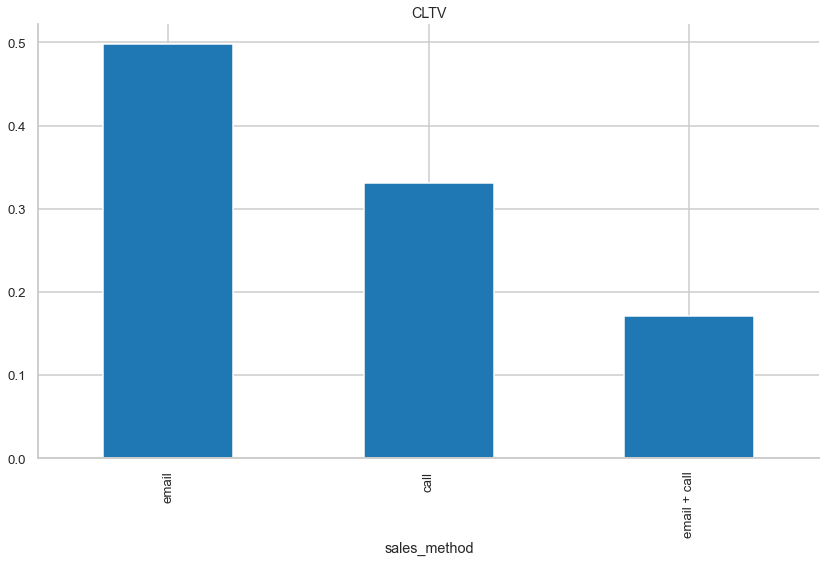

In [72]:
plt.subplots(figsize=(14,8))
(df1.groupby("sales_method")["groups"].apply(len) / df.shape[0]).sort_values(ascending=False).plot(kind='bar')
plt.title("CLTV")
sns.despine()
plt.show()

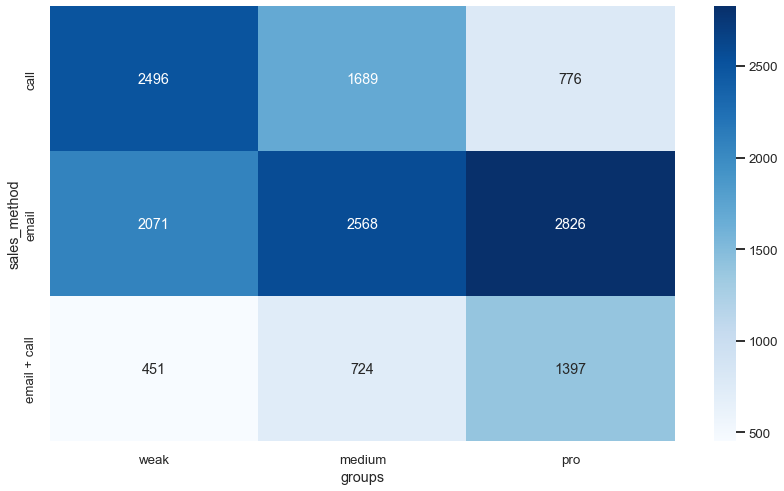

In [88]:
plt.subplots(figsize=(14,8))
sns.heatmap(df1.pivot_table(index="sales_method",columns="groups",aggfunc='count',values = 'state'),annot=True,fmt='.5g',cmap='Blues')
plt.show()

<div style="display: flex; justify-content: space-between;">
    <img src="1.png" alt="Image 1" width="300"/>
    <img src="2.png" alt="Image 2" width="300"/>
</div>

- based on the previous insights ,email has the most revenue and most n-of customers got from this method

<div style="display: flex; justify-content: space-between;">
    <img src="4.png" alt="Image 2" width="300"/>
    <img src="5.png" alt="Image 2" width="300"/>
</div>

based on the previous insights ,email method has the most pro customer two times email+call method 

<div style="display: flex; justify-content: space-between;">
    <img src="3.png" alt="Image 2" width="300"/>
    <img src="Sta.png" alt="Image 2" width="300"/>
    <img src="y.png" alt="Image 2" width="300"/>
</div>

- California is the most state has pro customers followed by texas and new york and overall customers the same
- on the second insight claifornia has the most pro customer for each method
- **Claifornia is the best state to focus our attention on**
- and email is the best method to have pro customer from california unlike another methods

- the previous insights which suggest that emaill+call is the best method is tricky ,because this method has Outliers which give us Deceptive thoughts , so after saw the lastest insights i suggest that the email method is the best method and clafornia is the best state
- and because of that the email+call method starts first week with low sales the change ratio from first and last week is high which is misleading us unlike email method which starts with high sales and ends with low sales

- i don't have enough informations about what is going on the week 5 and 6 which makes drop on sales

<div style="display: flex; justify-content: space-between;">
    <img src="AGES3.png" alt="Image 2" width="300"/>
    <img src="AGES2.png" alt="Image 2" width="300"/>
    <img src="AGES1.png" alt="Image 2" width="300"/>
    <img src="AGES.png" alt="Image 2" width="300"/>
</div>

- the weak customers : ages between 0 to 3
- the medium customers : ages between 2 to 5
- the pro customers : ages between 6 to 13

# Business Goal :
- Our focus has been on selling products to enable our customers to be more creative, focused on tools for brainstorming. We have tested three different sales strategies for this, targeted email and phone calls, as well as combining the two.
- the best techniques to sell the new product effectively.
- Some of these methods take more time from the team so they may not be the best for us.

# Recommendations

- email method is the best method also meet the team needs ( " the team don't have times " )
- focus on California ,Texas ,New York ,Florida ( Especially California which has more frequently high number of sold per order unlike others cities )
- we got high revenue from California ,Texas ,New York ,Florida unlike others cities ,there is relation between high orders and revenue which is related to this cities ,especially "California"
- increase the number of sales > increase the revenue (" email has the most number of sales and also highest revenue ")